In [20]:
# Importation de la bibliothèque pandas pour la manipulation des données
import pandas as pd

# Lecture du fichier CSV contenant les données sur l'efficacité du sommeil
data = pd.read_csv('Sleep_Efficiency.csv')

# Affichage des cinq premières lignes du jeu de données pour avoir un aperçu des données
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [21]:
# Affichage des informations sur le jeu de données
# Cela inclut le nombre de lignes, le nombre de colonnes, le type de chaque colonne et le nombre de valeurs non nulles dans chaque colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [22]:
# Vérification du nombre de valeurs manquantes dans chaque colonne du jeu de données
data.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Smoking status             0
Exercise frequency         6
dtype: int64

In [23]:
# Remplacement des valeurs manquantes par la moyenne de chaque colonne
data.fillna(data.mean(), inplace=True)
# Vérification pour s'assurer qu'il n'y a plus de valeurs manquantes
data.isnull().sum()

C:\Users\ibras\AppData\Local\Temp\ipykernel_2664\4013765711.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

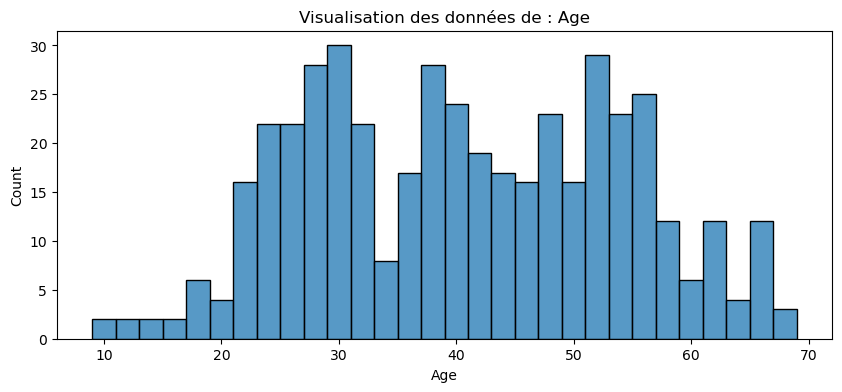

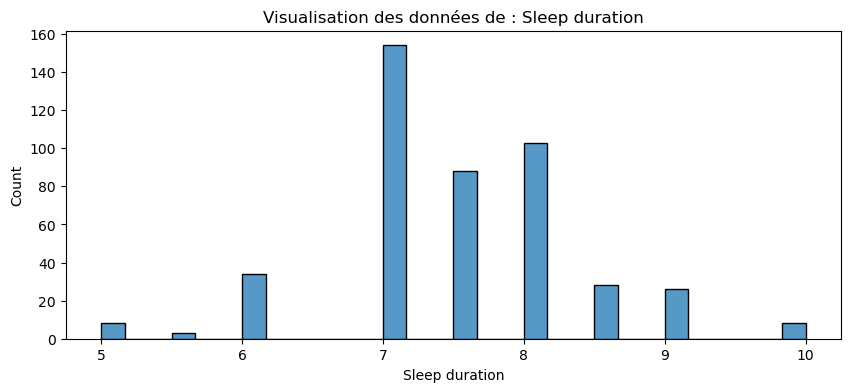

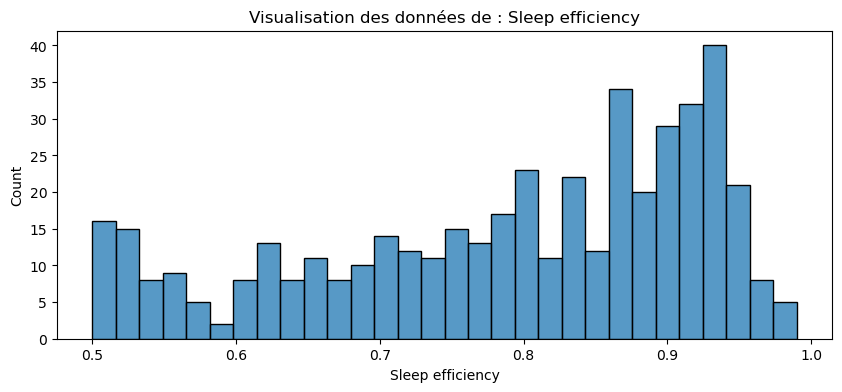

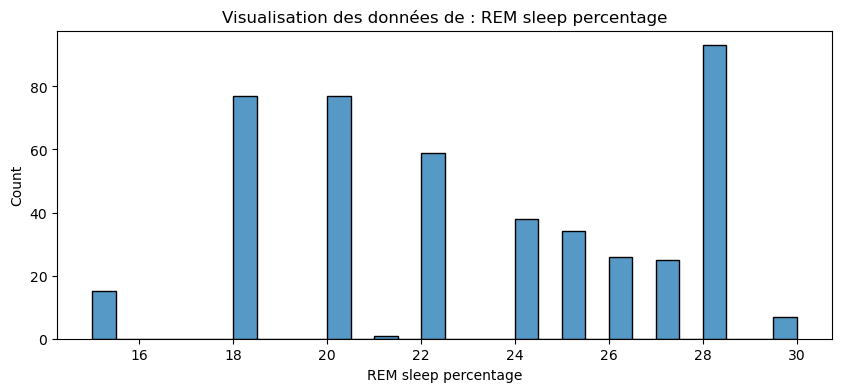

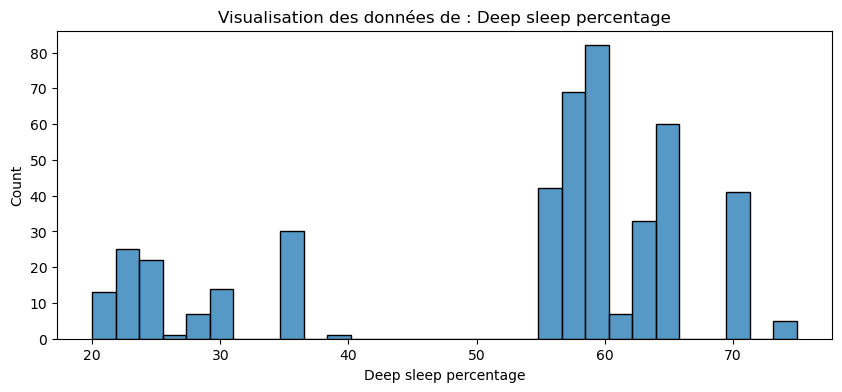

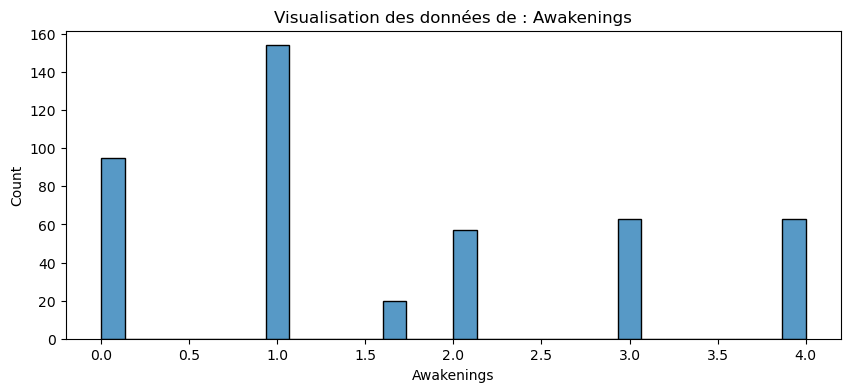

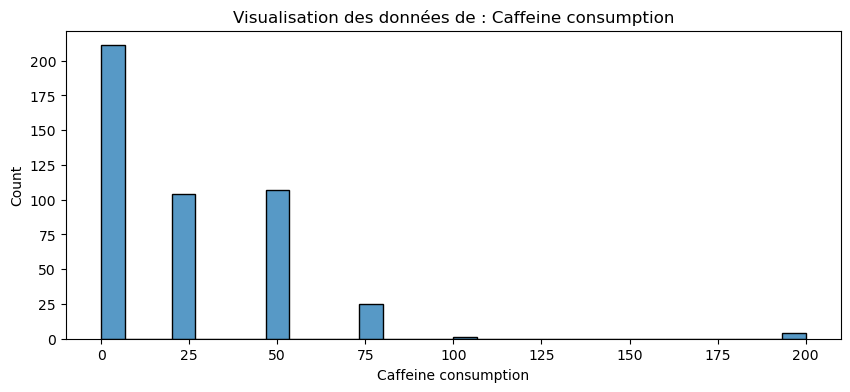

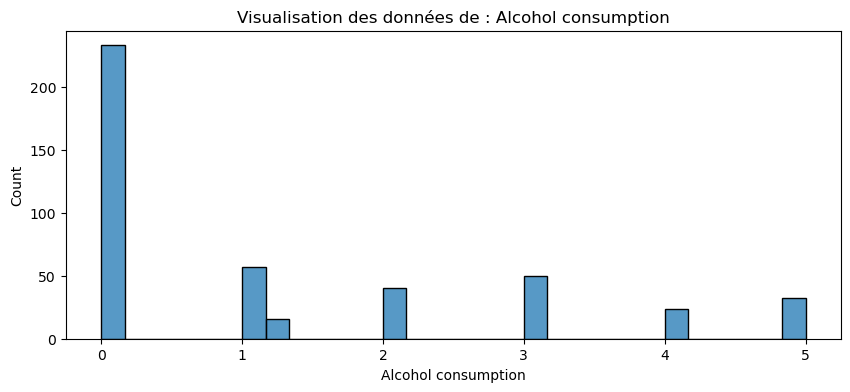

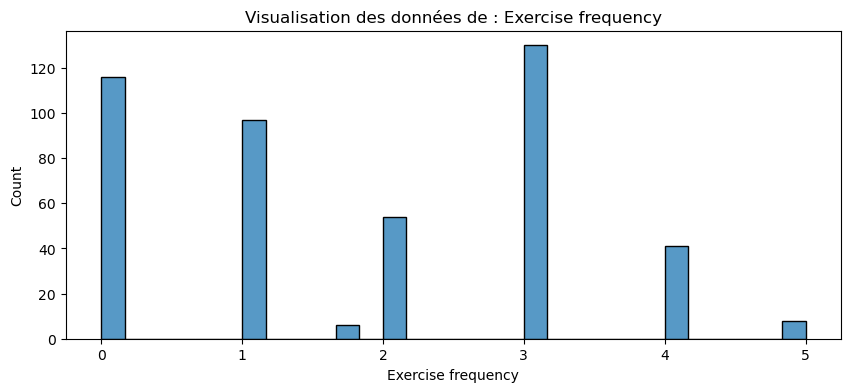

In [24]:
# Importation des bibliothèques nécessaires pour la visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des caractéristiques numériques dans le jeu de données
numerical_features = ['Age', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

# Pour chaque caractéristique numérique, nous créons un histogramme pour visualiser sa distribution
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], bins=30)
    plt.title(f'Visualisation des données de : {feature}')
    plt.show()

C:\Users\ibras\AppData\Local\Temp\ipykernel_2664\620241120.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


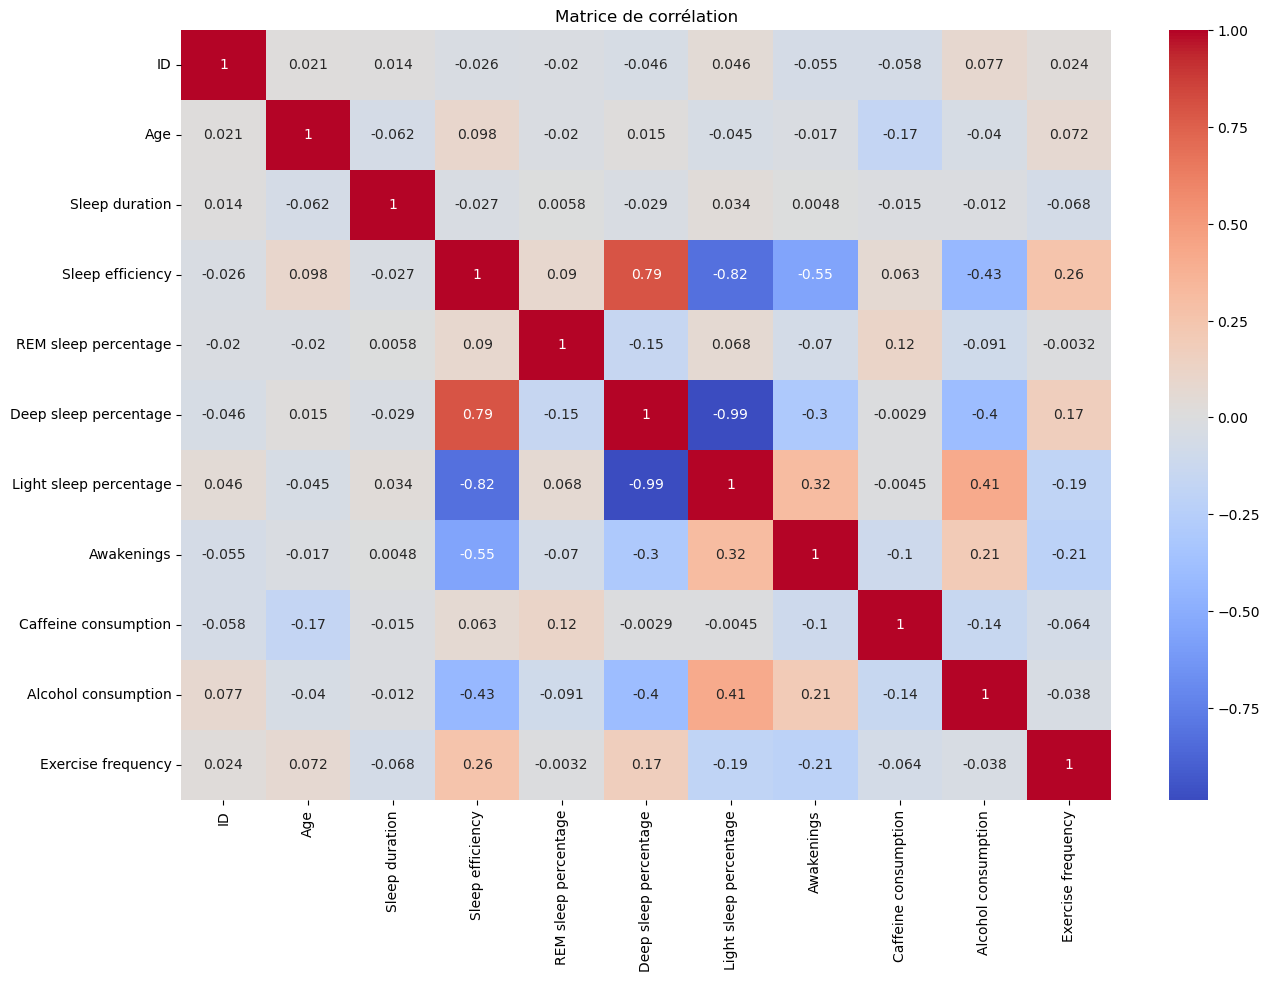

In [25]:
# Importation des bibliothèques nécessaires pour la visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'une figure pour la visualisation
plt.figure(figsize=(15,10))

# Calcul de la matrice de corrélation des données
correlation_matrix = data.corr()

# Création d'une heatmap pour visualiser la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Ajout d'un titre à la heatmap
plt.title('Matrice de corrélation')

# Affichage de la heatmap
plt.show()

In [29]:
# Importation de la fonction train_test_split pour diviser le jeu de données en un ensemble d'entraînement et un ensemble de test
from sklearn.model_selection import train_test_split

# Séparation des caractéristiques (X) de la variable cible (y)
X = data.drop('Sleep efficiency', axis=1)
y = data['Sleep efficiency']


In [30]:
from sklearn.preprocessing import StandardScaler
# Transformation des variables catégorielles en variables numériques
X = pd.get_dummies(X, drop_first=True)

# Division du jeu de données en un ensemble d'entraînement (80% des données) et un ensemble de test (20% des données)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Ajustement du StandardScaler sur l'ensemble d'entraînement et transformation de l'ensemble d'entraînement
X_train = scaler.fit_transform(X_train)

# Transformation de l'ensemble de test
X_test = scaler.transform(X_test)

In [34]:
# Importation du modèle Ridge de la bibliothèque sklearn
from sklearn.linear_model import Ridge

# Importation de la fonction mean_squared_error pour évaluer le modèle
from sklearn.metrics import mean_squared_error

# Création d'un objet Ridge avec alpha=1.0
model = Ridge(alpha=1.0)

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédiction des valeurs de l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de l'erreur quadratique moyenne entre les valeurs prédites et les valeurs réelles
mse = mean_squared_error(y_test, y_pred)
mse

0.0073131793746729545

In [35]:
# Importation de la fonction GridSearchCV pour l'optimisation des hyperparamètres
from sklearn.model_selection import GridSearchCV

# Définition des paramètres à tester
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Création d'un objet GridSearchCV avec le modèle Ridge, les paramètres à tester,
# l'utilisation de l'erreur quadratique moyenne négative comme score et la validation croisée en 5 parties
ridge_regressor = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', cv=5)

# Entraînement de GridSearchCV sur l'ensemble d'entraînement
ridge_regressor.fit(X_train, y_train)

# Affichage des meilleurs paramètres trouvés par GridSearchCV
ridge_regressor.best_params_

C:\Users\ibras\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


{'alpha': 5}

In [36]:
# Création d'un nouvel objet Ridge avec le meilleur paramètre alpha trouvé par GridSearchCV
model_optimized = Ridge(alpha=5)

# Entraînement du modèle optimisé sur l'ensemble d'entraînement
model_optimized.fit(X_train, y_train)

# Prédiction des valeurs de l'ensemble de test avec le modèle optimisé
y_pred_optimized = model_optimized.predict(X_test)

# Calcul de l'erreur quadratique moyenne entre les valeurs prédites par le modèle optimisé et les valeurs réelles
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mse_optimized

0.00577555382615469

In [37]:
# Importation de la fonction r2_score pour évaluer le modèle
from sklearn.metrics import r2_score

# Calcul du score R2 entre les valeurs prédites par le modèle optimisé et les valeurs réelles
r2_score = r2_score(y_test, y_pred_optimized)
r2_score = round(r2_score, 2) * 100
print("Taux d'éfficacité du model :", r2_score, "%")

Taux d'éfficacité du model : 69.0 %
